In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from scipy.misc import imread, imsave
import cPickle as pickle
import yaml
import collections
from tqdm import tqdm
import time
from scipy.ndimage.interpolation import zoom
import seaborn as sns
sns.set_style("whitegrid")

import datetime
from sunrise import sun

# london GPS location
s = sun(lat=51,long=0.1)

/home/michael/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/home/michael/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
resultsdir = '/home/michael/Dropbox/engage/FairbrassFirmanetal_/data/predictions/ours_on_all_data/'
fnames = os.listdir(resultsdir)

In [70]:
mapper = {'biotic': 'CityBioNet', 'anthrop': 'CityAnthroNet'}

def summary_from_fname(fname):
    """For a single results file, return the predicted activity level"""
    preds = pickle.load(open(resultsdir + fname))[:, 1]
    preds[np.isnan(preds)] = 0
    return np.mean(preds)


def fname_to_time(fname):
    """From a filename, extract the time"""
    return fname.split('_')[-2][:4]


def datetime_to_decimal(dt):
    """Convert datetime object to time as hour in decmals"""
    return float(dt.hour) + dt.minute / 60.0


def get_times_and_averages(base, classname):
    results = collections.defaultdict(list)
    for fname in fnames:
        if base in fname and classname in fname:
            time = fname_to_time(fname)
            results[time].append(summary_from_fname(fname))

    averages = []
    times = []
    
    # loop over each time and get the keys and summaries
    for hour in range(24):
        for half in [0, 1]:
            key = '%02d%02d' % (hour, half*30)
            averages.append(np.mean(results[key]))
            times.append(hour + half * 0.5 + 0.25)
    return times, averages


def plot_results(base, classname):
    """For a filename base, plot all theresults summaries"""
    times, averages = get_times_and_averages(base, classname)

    # Plotting activity levels
    plt.plot(times, averages, label=mapper[classname])
    plt.xlabel('Hour of day', fontsize=16)
    plt.ylabel('Level of activity', fontsize=16)
    plt.xlim(0, 24)
    plt.ylim(0, 1)
    plt.xticks([0, 6, 12, 18, 24], ['00:00', '06:00', '12:00', '18:00', '24:00'], fontsize=14)
    #plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
    plt.yticks([0, 1.0], fontsize=14)

    # Plotting sunset/sunrise times
    print "Warning - just using first recording for sunset..."
    datestr = [xx for xx in fnames if xx.startswith(base)][0].split('_')[1]
    when = datetime.datetime.strptime(datestr, '%Y%m%d')
    sunrise = s.sunrise(when=when)
    sunset = s.sunset(when=when)
    
    sun_colour = np.array([0.9, 0.3, 0.3])
    sr = datetime_to_decimal(sunrise)
    plt.plot([sr, sr], [0.075, 1], '--', color=sun_colour)
    #plt.text(sr - 1.3, 1.01, 'Sunrise', fontsize=16, color=sun_colour)
    plt.text(sr - 1.3, .015, 'Sunrise', fontsize=16, color=sun_colour)
    
    ss = datetime_to_decimal(sunset)
    plt.plot([ss, ss], [0.075, 1], '--', color=sun_colour)
    plt.text(ss - 1.3, .015, 'Sunset', fontsize=16, color=sun_colour)

    
def set_up_plot():
    plt.figure(figsize=(10, 4.5))
#     ax = plt.subplot(111)
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

In [71]:
save_dir = '/home/michael/Dropbox/engage/FairbrassFirmanetal_/data/predictions/per_file_preds/'

Warning - just using first recording for sunset...
IG62XL-13534_20150512_190000_biotic.pkl IG62XL-13534_
Warning - just using first recording for sunset...
IG62XL-13534_20150512_190000_biotic.pkl IG62XL-13534_


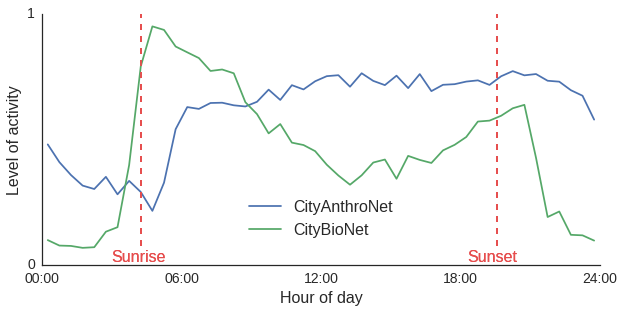

In [72]:
site = 'IG62XL-13534_'

set_up_plot()
plot_results(site, 'anthrop')
plot_results(site, 'biotic')
plt.legend(fontsize=16, loc='lower center', bbox_to_anchor=(0.5, 0.05))

sns.set_style("white")
sns.despine()

plt.savefig(save_dir + '/%s.png' % site, dpi=200)
plt.savefig(save_dir + '/%s.pdf' % site)

Warning - just using first recording for sunset...
IG62XL-13534_20150512_190000_biotic.pkl E29RR-013378_
Warning - just using first recording for sunset...
IG62XL-13534_20150512_190000_biotic.pkl E29RR-013378_


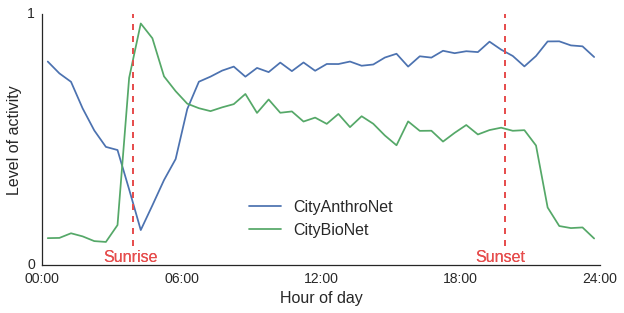

In [73]:
site = 'E29RR-013378_'

set_up_plot()
plot_results(site, 'anthrop')
plot_results(site, 'biotic')
plt.legend(fontsize=16, loc='lower center', bbox_to_anchor=(0.5, 0.05))

sns.set_style("white")
sns.despine()

plt.savefig(save_dir + '/%s.png' % site, dpi=200)
plt.savefig(save_dir + '/%s.pdf' % site)

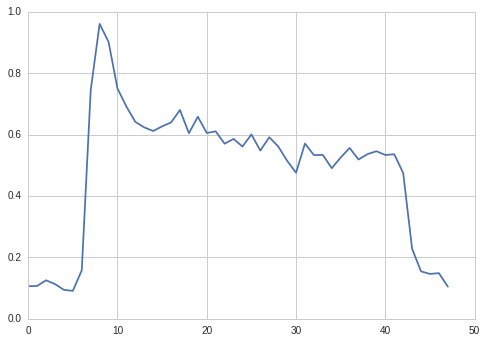

In [30]:
plt.plot(averages)

In [38]:
this_class_json.keys()

['["0000-00-00T07:00:00.000Z"',
 '["0000-00-00T16:00:00.000Z"',
 '["0000-00-00T10:30:00.000Z"',
 '["0000-00-00T02:30:00.000Z"',
 '["0000-00-00T16:30:00.000Z"',
 '["0000-00-00T18:00:00.000Z"',
 '["0000-00-00T00:00:00.000Z"',
 '["0000-00-00T15:00:00.000Z"',
 '["0000-00-00T15:30:00.000Z"',
 '["0000-00-00T13:30:00.000Z"',
 '["0000-00-00T19:30:00.000Z"',
 '["0000-00-00T09:30:00.000Z"',
 '["0000-00-00T17:30:00.000Z"',
 '["0000-00-00T12:30:00.000Z"',
 '["0000-00-00T10:00:00.000Z"',
 '["0000-00-00T01:00:00.000Z"',
 '["0000-00-00T19:00:00.000Z"',
 '["0000-00-00T11:00:00.000Z"',
 '["0000-00-00T08:30:00.000Z"',
 '["0000-00-00T07:30:00.000Z"',
 '["0000-00-00T04:00:00.000Z"',
 '["0000-00-00T14:00:00.000Z"',
 '["0000-00-00T05:00:00.000Z"',
 '["0000-00-00T03:30:00.000Z"',
 '["0000-00-00T22:00:00.000Z"',
 '["0000-00-00T11:30:00.000Z"',
 '["0000-00-00T21:00:00.000Z"',
 '["0000-00-00T05:30:00.000Z"',
 '["0000-00-00T08:00:00.000Z"',
 '["0000-00-00T22:30:00.000Z"',
 '["0000-00-00T23:30:00.000Z"',
 '["0000

In [39]:
import json
all_json = []
for classname in ['anthrop', 'biotic']:
    times, averages = get_times_and_averages('E29RR-013378_', classname)
    times = np.array(times)
    times -= 0.25
    
    this_class_json = {}
    for time, avg in zip(times, averages):
        hr = int(time)
        mins = int((time - hr) * 60.0)
#         print "[\"0000-00-00T%02d:%02d:00.000Z\", %f], " % (hr, mins, avg),
        this_class_json["0000-00-00T%02d:%02d:00.000Z" % (hr, mins)] = str(avg)

    all_json.append({"name": classname, "data": this_class_json})
json.dumps(all_json)

'[{"data": {"0000-00-00T06:00:00.000Z": "0.620196", "0000-00-00T20:30:00.000Z": "0.790156", "0000-00-00T19:00:00.000Z": "0.888622", "0000-00-00T06:30:00.000Z": "0.729119", "0000-00-00T12:30:00.000Z": "0.799494", "0000-00-00T09:30:00.000Z": "0.767389", "0000-00-00T22:30:00.000Z": "0.873739", "0000-00-00T15:30:00.000Z": "0.789358", "0000-00-00T04:30:00.000Z": "0.236719", "0000-00-00T17:00:00.000Z": "0.852331", "0000-00-00T23:30:00.000Z": "0.827514", "0000-00-00T04:00:00.000Z": "0.138325", "0000-00-00T16:30:00.000Z": "0.825144", "0000-00-00T03:00:00.000Z": "0.45707", "0000-00-00T15:00:00.000Z": "0.840493", "0000-00-00T23:00:00.000Z": "0.870065", "0000-00-00T07:00:00.000Z": "0.749402", "0000-00-00T16:00:00.000Z": "0.830425", "0000-00-00T05:00:00.000Z": "0.337477", "0000-00-00T03:30:00.000Z": "0.300276", "0000-00-00T17:30:00.000Z": "0.842763", "0000-00-00T10:30:00.000Z": "0.771307", "0000-00-00T19:30:00.000Z": "0.856931", "0000-00-00T11:00:00.000Z": "0.805777", "0000-00-00T18:30:00.000Z": "


      new Chartkick.LineChart("multiple-line", [{"name":"Workout","data":{"2013-02-10":3,"2013-02-17":3,"2013-02-24":3,"2013-03-03":1,"2013-03-10":4,"2013-03-17":3,"2013-03-24":2,"2013-03-31":3}},{"name":"Go to concert","data":{"2013-02-10":0,"2013-02-17":0,"2013-02-24":0,"2013-03-03":0,"2013-03-10":2,"2013-03-17":1,"2013-03-24":0,"2013-03-31":0}},{"name":"Wash face","data":{"2013-02-10":0,"2013-02-17":1,"2013-02-24":0,"2013-03-03":0,"2013-03-10":0,"2013-03-17":1,"2013-03-24":0,"2013-03-31":1}},{"name":"Call parents","data":{"2013-02-10":5,"2013-02-17":3,"2013-02-24":2,"2013-03-03":0,"2013-03-10":0,"2013-03-17":1,"2013-03-24":1,"2013-03-31":0}},{"name":"Eat breakfast","data":{"2013-02-10":3,"2013-02-17":2,"2013-02-24":1,"2013-03-03":0,"2013-03-10":2,"2013-03-17":2,"2013-03-24":3,"2013-03-31":0}}]);
    </script>